<a href="https://colab.research.google.com/github/yichi17lin/github-colab/blob/%E8%87%89%E9%83%A8%E8%BE%A8%E8%AD%98/20240612_%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92_%E8%87%89%E9%83%A8%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   應用的想法，參考Yen-lung Tsai
*   圖片資料庫，參考Yen-lung Tsai
*   使用deepface去比對資料庫的照片，建立face的資料夾，每個人都有自己的資料夾才可以，這樣就不用寫程式一一比對，只要用deepface去完成就可以


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#安裝並導入 DeepFace
!pip install deepface
!pip show deepface
import deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=f668f684582975b2f0a111f6c436b3ec950ffe488909680c0d3296cbf3bc9a6e
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
Name: deepface
Version: 0.0.92
Summary: A Lightweight Face Recognition and Facial Attribute Analysis Framework (Age, Gender, Emotion, Race) for Python
Home-page: https://github.com/serengil/deepface
Author: Sefik Ilkin Serengil
Author-email: serengil@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: fire, Flask, gdown, 

In [ ]:
from deepface import DeepFace

In [ ]:
#讀入 photos.zip
!wget --no-check-certificate \
    https://github.com/yenlung/Deep-Learning-Basics/raw/master/images/photos.zip \
    -O /content/photos.zip

--2024-06-11 16:53:53--  https://github.com/yenlung/Deep-Learning-Basics/raw/master/images/photos.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yenlung/Deep-Learning-Basics/master/images/photos.zip [following]
--2024-06-11 16:53:53--  https://raw.githubusercontent.com/yenlung/Deep-Learning-Basics/master/images/photos.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1758026 (1.7M) [application/zip]
Saving to: ‘/content/photos.zip’

/content/photos.zip 100%[===================>]   1.68M  --.-KB/s    in 0.02s   

2024-06-11 16:53:53 (101 MB/s) - ‘/content/photos.zip’ saved [1758026/1758026

In [ ]:
#解壓縮
import os
import zipfile

local_zip = '/content/photos.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#這裡秀出照片, 看照片內容是什麼
import cv2

In [ ]:
def show_image(*args):
    k = len(args)
    fig = plt.figure(figsize=(5*k, 5))
    for i, photo in enumerate(args):
        plt.subplot(1,k,i+1)
        plt.axis('off')
        plt.axis('equal')
        plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))

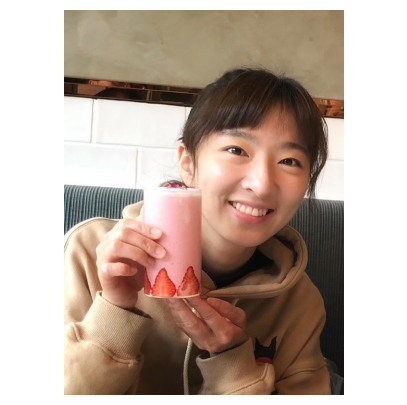

In [ ]:
#秀一張im01的照片
show_image(im01)

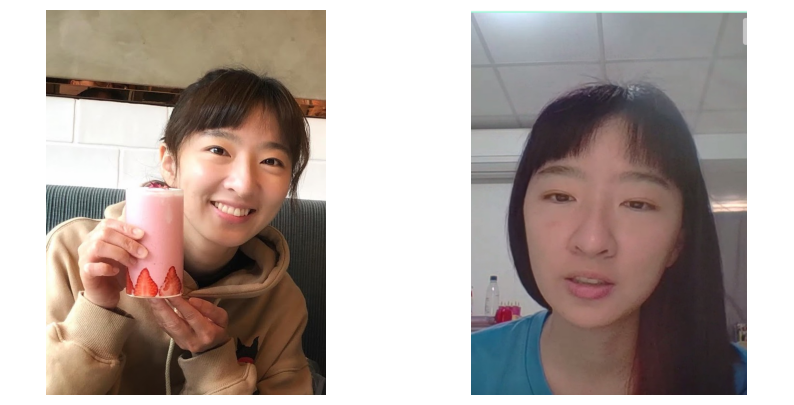

In [ ]:
#秀多張照片
show_image(im01, im02)

In [ ]:
#verify 看兩個人是不是同一個人
base_dir = "/content/photos"
face_dir = "/content/photos/faces"

im01_path = base_dir + '/' + "yenjan.jpg"
im01 = cv2.imread(im01_path)

im02_path = face_dir + '/yenjan/yenjan01.jpg'
im02 = cv2.imread(im02_path)

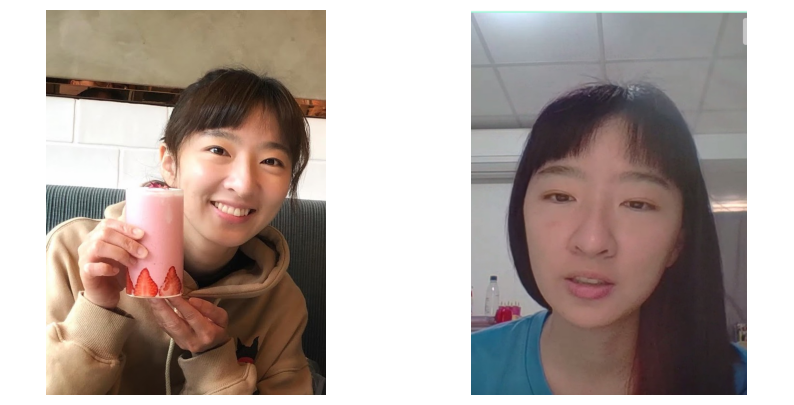

In [ ]:
show_image(im01, im02)

In [ ]:
result  = DeepFace.verify(im01, im02)

24-06-11 16:58:18 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:07<00:00, 75.3MB/s]


In [ ]:
result

{'verified': True,
 'distance': 0.45339500046487424,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 241,
   'y': 201,
   'w': 268,
   'h': 268,
   'left_eye': (463, 316),
   'right_eye': (354, 293)},
  'img2': {'x': 110,
   'y': 379,
   'w': 535,
   'h': 535,
   'left_eye': (481, 581),
   'right_eye': (263, 558)}},
 'time': 17.9}

In [ ]:
result['verified']

True

In [ ]:
result  = DeepFace.verify(im01, im02, model_name="Facenet512")

24-06-11 16:59:36 - facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:00<00:00, 223MB/s]


In [ ]:
result['verified']

True

接下來是分析照片中這個人的性別、年齡、種族、情緒

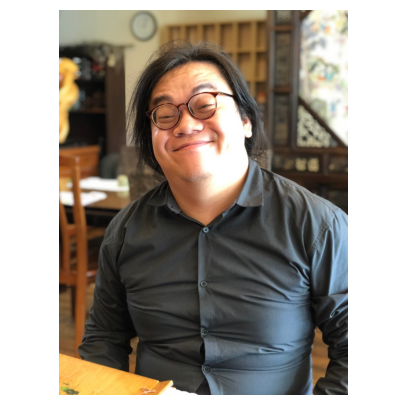

In [ ]:
im04_path = base_dir + '/' + "tseyu.jpg"
im04 = cv2.imread(im04_path)
show_image(im04)

In [ ]:
obj = DeepFace.analyze(img_path = im04_path, actions = ['age', 'gender', 'race', 'emotion'])

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]


In [ ]:
obj

[{'age': 25,
  'region': {'x': 800,
   'y': 348,
   'w': 74,
   'h': 74,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.99,
  'gender': {'Woman': 7.696822285652161, 'Man': 92.30318069458008},
  'dominant_gender': 'Man',
  'race': {'asian': 2.081933058798313,
   'indian': 3.206460177898407,
   'black': 0.5462076049298048,
   'white': 53.47016453742981,
   'middle eastern': 29.589277505874634,
   'latino hispanic': 11.105954647064209},
  'dominant_race': 'white',
  'emotion': {'angry': 0.011016476491931826,
   'disgust': 8.081087088385175e-06,
   'fear': 0.2647273475304246,
   'happy': 68.45546364784241,
   'sad': 0.1594187691807747,
   'surprise': 0.020681714522652328,
   'neutral': 31.08868896961212},
  'dominant_emotion': 'happy'}]

以上為分析這張圖片裡的人物性別、年齡、種族、情緒

In [ ]:
labels = {'angry':'生氣', 'disgust':'厭惡', 'fear':'恐懼',
          'happy':'開心', 'neutral':'沒什麼特別表情',
          'sad':'悲傷', 'surprise':'吃驚',
          'Man':'男', 'Woman':'女',
          'asian':'亞洲', 'black':'黑', 'indian':'印弟安',
          'latino hispanic':'拉丁美洲 (西班牙裔)',
          'middle eastern':'中東', 'white':'白'}

In [ ]:
def show_info(obj):
  age = obj['age']
  emotion = labels[obj['dominant_emotion']]
  race = labels[obj['dominant_race']]
  gender = labels[obj['gender']]
  text = f"這是一位 {age} 歲的{race}人{gender}子, 他感覺是{emotion}的。"
  print(text)

In [ ]:
show_info(obj=obj)

TypeError: list indices must be integers or slices, not str

In [ ]:
im05_path = base_dir + "/yanwen.jpg"
im05 = cv2.imread(im05_path)

In [ ]:
obj = DeepFace.analyze(img_path = im05_path, actions = ['age', 'gender', 'race', 'emotion'])

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]


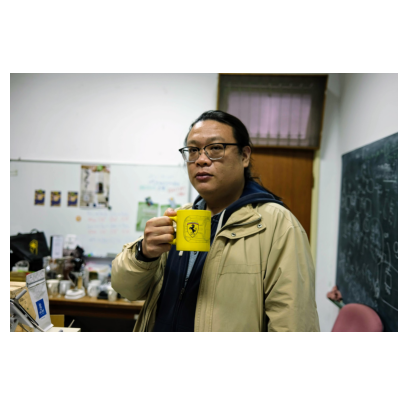

In [ ]:
show_image(im05)
show_info(obj)

以上為同時秀出敘述與圖片